In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/j6/19hd1bln7bx6375t_4njz15w0000gn/T/ipykernel_83935/3749009752.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/var/folders/j6/19hd1bln7bx6375t_4njz15w0000gn/T/ipykernel_83935/3749009752.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/var/folders/j6/19hd1bln7bx6375t_4njz15w0000gn/T/ipykernel_83935/3749009752.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/var/folders/j6/19hd1bln7bx6375t_4njz15w0000gn/T/ipykernel_83935/3749009752.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


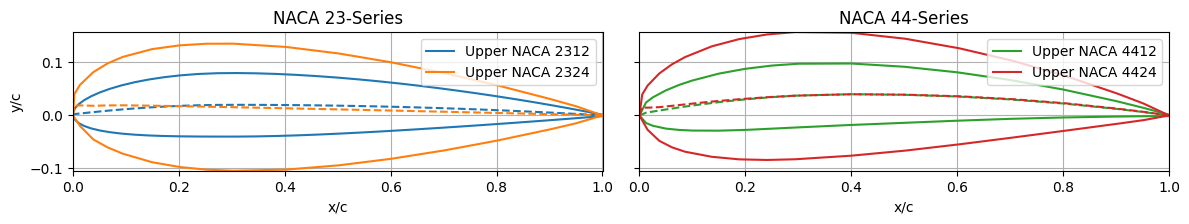

In [2]:
def read_airfoil(file):
    # file has: x y  (whole surface, upper then lower)
    df = pd.read_csv(
        file,
        delim_whitespace=True,
        names=["x", "y"],
        skiprows=1,
    )

    # index of leading edge = minimum x
    i_le = df["x"].idxmin()

    # upper: TE -> LE, lower: LE -> TE
    upper = df.iloc[:i_le+1].copy()
    lower = df.iloc[i_le:].copy()

    # sort both surfaces to go from x = 0 -> 1
    upper = upper.sort_values("x")
    lower = lower.sort_values("x")

    # put them on the same x-grid (use upper.x as reference)
    x = upper["x"].values
    y_upper = upper["y"].values
    y_lower = np.interp(x, lower["x"].values, lower["y"].values)

    # camber line
    camber = 0.5 * (y_upper + y_lower)

    return x, y_upper, y_lower, camber

x_2312, yU_2312, yL_2312, C_2312 = read_airfoil("/Users/madslangkjaerjakobsen/Documents/DTU/2. Semester Kandidat/Aerodynamics/Assignment 1/AirfoilData/NACA2312.txt")
x_2324, yU_2324, yL_2324, C_2324 = read_airfoil("/Users/madslangkjaerjakobsen/Documents/DTU/2. Semester Kandidat/Aerodynamics/Assignment 1/AirfoilData/NACA2324.txt")
x_4212, yU_4212, yL_4212, C_4212 = read_airfoil("/Users/madslangkjaerjakobsen/Documents/DTU/2. Semester Kandidat/Aerodynamics/Assignment 1/AirfoilData/NACA4412.txt")
x_4224, yU_4224, yL_4224, C_4224 = read_airfoil("/Users/madslangkjaerjakobsen/Documents/DTU/2. Semester Kandidat/Aerodynamics/Assignment 1/AirfoilData/NACA4424.txt")

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax1, ax2 = axes

# ---------------------------
# LEFT SUBPLOT (23xx series)
# ---------------------------
ax1.plot(x_2312, yU_2312, label="Upper NACA 2312", color="#1f77b4")
ax1.plot(x_2312, yL_2312, color="#1f77b4")
ax1.plot(x_2312, C_2312, color="#1f77b4", linestyle="--")

ax1.plot(x_2324, yU_2324, label="Upper NACA 2324", color="#ff7f0e")
ax1.plot(x_2324, yL_2324, color="#ff7f0e")
ax1.plot(x_2324, C_2324, color="#ff7f0e", linestyle="--")

ax1.set_title("NACA 23-Series")
ax1.set_xlabel("x/c")
ax1.set_ylabel("y/c")
ax1.grid(True)
ax1.legend()


# ---------------------------
# RIGHT SUBPLOT (44xx series)
# ---------------------------
ax2.plot(x_4212, yU_4212, label="Upper NACA 4412", color="#2ca02c")
ax2.plot(x_4212, yL_4212, color="#2ca02c")
ax2.plot(x_4212, C_4212, color="#2ca02c", linestyle="--")

ax2.plot(x_4224, yU_4224, label="Upper NACA 4424", color="#d62728")
ax2.plot(x_4224, yL_4224, color="#d62728")
ax2.plot(x_4224, C_4224, color="#d62728", linestyle="--")

ax2.set_title("NACA 44-Series")
ax2.set_xlabel("x/c")
ax2.grid(True)
ax2.legend()

# ---------------------------
# ENFORCE IDENTICAL AXES
# ---------------------------
# Get global min/max across all 4 airfoils
x_min = min(x_2312.min(), x_2324.min(), x_4212.min(), x_4224.min())
x_max = max(x_2312.max(), x_2324.max(), x_4212.max(), x_4224.max())

y_min = min(yU_2312.min(), yL_2312.min(),
            yU_2324.min(), yL_2324.min(),
            yU_4212.min(), yL_4212.min(),
            yU_4224.min(), yL_4224.min())

y_max = max(yU_2312.max(), yL_2312.max(),
            yU_2324.max(), yL_2324.max(),
            yU_4212.max(), yL_4212.max(),
            yU_4224.max(), yL_4224.max())

# Set same limits for both
for ax in (ax1, ax2):
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', 'box')

plt.tight_layout()
plt.show()